In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost as xgb
import tensorflow as tf


In [2]:
df = pd.read_csv('SOLUSTDAtas_tratado.csv')
df.head()

,date,open,high,low,close
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36400 entries, 0 to 36399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    36400 non-null  object 
 1   open    36400 non-null  float64
 2   high    36400 non-null  float64
 3   low     36400 non-null  float64
 4   close   36400 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.4+ MB
None


# Preprocesado de Datos

In [3]:
tamanio = df.shape[0]

In [4]:
df_train = df.copy().loc[0:int(tamanio*0.7)]
df_train

,date,open,high,low,close
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25
...,...,...,...,...,...
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95
25479,2023-07-12 00:00:00,21.95,22.10,21.90,22.05


In [5]:
df_vali = df.copy().loc[int(tamanio*0.7 + 1):int(tamanio*0.9)]
df_vali

,date,open,high,low,close
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95
25485,2023-07-12 06:00:00,21.95,22.05,21.90,22.00
...,...,...,...,...,...
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30
32759,2024-05-10 08:00:00,153.30,155.10,153.15,154.95


In [6]:
df_test = df.copy().loc[int(tamanio*0.9 + 1):tamanio]
df_test

,date,open,high,low,close
32761,2024-05-10 10:00:00,154.35,154.5,153.45,154.10
32762,2024-05-10 11:00:00,154.10,154.8,153.25,154.15
32763,2024-05-10 12:00:00,154.15,154.3,153.25,154.15
32764,2024-05-10 13:00:00,154.15,155.2,153.00,155.05
32765,2024-05-10 14:00:00,155.05,155.4,153.10,153.30
...,...,...,...,...,...
36395,2024-10-08 20:00:00,143.35,143.9,142.35,142.95
36396,2024-10-08 21:00:00,142.95,144.1,142.25,143.75
36397,2024-10-08 22:00:00,143.75,144.5,143.35,144.50
36398,2024-10-08 23:00:00,144.50,144.7,144.05,144.25


# Declaramos y Entrenamos el modelo

In [7]:
numhoras = 4

Declaramos el modelo

In [8]:
regr1 = RandomForestRegressor(max_depth=100, random_state=0)

Funció que prepara un dataset en el formato requerido por RandomForest

In [14]:
def preparar_datosRandomForest(df):
    X = []
    y= []
    for i in range(0, df.shape[0] - numhoras):
        auxy = df.iloc[i + numhoras]
        y.append(auxy.close)
        aux1 = []
        for e in range(0, numhoras):
            aux = df.iloc[i + e]
            for r in range(1, aux.size):
                aux1.append(aux[r])
        X.append(aux1)
    return (X, y)

In [15]:
data = preparar_datosRandomForest(df_train)
X1 = data[0]
y1 = data[1]

C:\Users\raulg\AppData\Local\Temp\ipykernel_17616\235810762.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


Entrenamos el modelo con los datos de entrenamiento

In [16]:
regr1.fit(X1, y1)

RandomForestRegressor(max_depth=100, random_state=0)

Preparamos los datos de validación

In [22]:
data = preparar_datosRandomForest(df_vali)
Vali = data[0]
Valirpr = data[1]

C:\Users\raulg\AppData\Local\Temp\ipykernel_17616\235810762.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


Realizamos una predicción usando los datos de validación

In [23]:
predict = regr1.predict(Vali)
print(predict)

[ 21.9445  21.9335  22.0455 ... 153.523  152.4575 156.188 ]


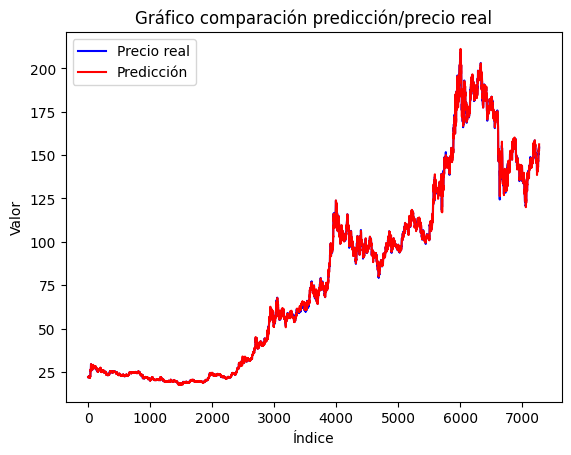

In [24]:
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predict, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [25]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - predict))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.7455901594282566
El error medio porcentualemente es: 0.8769466270432281


Ahora los valores de test

In [26]:
data = preparar_datosRandomForest(df_test)
Test = data[0]
Testrpr = data[1]

C:\Users\raulg\AppData\Local\Temp\ipykernel_17616\235810762.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


In [27]:
predictT = regr1.predict(Test)
print(predictT)

[156.0545 152.989  152.3555 ... 143.0605 143.672  143.547 ]


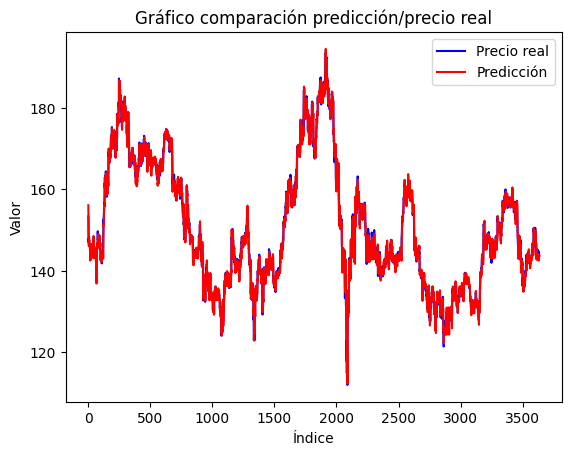

In [28]:
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predictT, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [29]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - predictT))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predictT[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.0351544704264102
El error medio porcentualemente es: 0.6957653992212691


Desarrollamos un algoritmo para entrenar distintas instacias con distintos parámetros y compararlas

In [25]:
def evalRandomForest(Testrpr, predictT):
    suma = 0
    n = len(Testrpr)
    for i in range(0,n):
        suma = abs(predictT[i] - Testrpr[i])/Testrpr[i] +  suma
    error_medio = suma/n
    emp = error_medio*100 # error medio en porcentaje
    return emp

In [31]:
def train_randomForest(ini, fin):
    posbest = 0
    best = 100
    for i in range(ini, fin):
        regr1 = RandomForestRegressor(max_depth=100, random_state=i)
        regr1.fit(X1, y1)
        predictT = regr1.predict(Test)
        valor = evalRandomForest(Testrpr, predictT)
        if valor < best:
            best = valor
            posbest = i
    print(best)
    print(posbest)
        

In [32]:
train_randomForest(0, 50)

1.0012534170038214
5


In [29]:
def train_randomForestdepth(ini, fin):
    posbest = 0
    best = 100
    for i in range(ini, fin):
        regr1 = RandomForestRegressor(max_depth=i, random_state=0)
        regr1.fit(X1, y1)
        predictT = regr1.predict(Test)
        valor = evalRandomForest(Testrpr, predictT)
        print(str(i) + " " + str(round(valor, 4)))
        if valor < best:
            best = valor
            posbest = i
    print(best)
    print(posbest)

In [30]:
train_randomForestdepth(1, 30)

1 7.852
2 17.6033
3 4.7748
4 2.2934
5 1.3099
6 0.9634
7 0.8974
8 0.904
9 0.9135
10 0.9284
11 0.9472
12 0.9647
13 0.9761
14 0.9882
15 1.0007
16 1.0088
17 1.0117
18 1.0156
19 1.0163
20 1.016
21 1.0158
22 1.0191
23 1.0175
24 1.0178
25 1.0173
26 1.0176
27 1.0165
28 1.0172
29 1.018
0.897413025734916
7


# Predicción Utilizando XGBoost

Ponemos los datos en el formato correcto

In [ ]:
df_xgb = df.copy()
df_xgb['close_next'] = df_xgb['close'].shift(-1)


In [ ]:
df_xgb = df_xgb.dropna()
df_xgb

,date,open,high,low,close,close_next
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,3.15
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,3.30
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,3.25
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,3.25
...,...,...,...,...,...,...
36394,2024-10-08 19:00:00,143.80,143.95,142.40,143.35,142.95
36395,2024-10-08 20:00:00,143.35,143.90,142.35,142.95,143.75
36396,2024-10-08 21:00:00,142.95,144.10,142.25,143.75,144.50
36397,2024-10-08 22:00:00,143.75,144.50,143.35,144.50,144.25


In [ ]:
tamanio_xgb = df_xgb.shape[0]
tamanio_xgb

36399

In [ ]:
df_train_xgb = df_xgb.copy().loc[0:int(tamanio_xgb*0.7)]
df_train_xgb

,date,open,high,low,close,close_next
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,3.15
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,3.30
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,3.25
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,3.25
...,...,...,...,...,...,...
25475,2023-07-11 20:00:00,22.10,22.10,21.95,22.00,22.00
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,22.00
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00,21.95
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,22.05


In [ ]:
df_vali_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.7 + 1):int(tamanio_xgb*0.9)]
df_vali_xgb

,date,open,high,low,close,close_next
25480,2023-07-12 01:00:00,22.05,22.15,22.00,22.10,22.15
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,22.10
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,22.00
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00,21.95
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95,22.00
...,...,...,...,...,...,...
32755,2024-05-10 04:00:00,153.40,153.80,152.70,153.65,153.95
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95,153.75
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,153.30
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,154.95


In [ ]:
df_test_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.9 + 1):tamanio_xgb]
df_test_xgb

,date,open,high,low,close,close_next
32760,2024-05-10 09:00:00,154.95,155.75,154.25,154.35,154.10
32761,2024-05-10 10:00:00,154.35,154.50,153.45,154.10,154.15
32762,2024-05-10 11:00:00,154.10,154.80,153.25,154.15,154.15
32763,2024-05-10 12:00:00,154.15,154.30,153.25,154.15,155.05
32764,2024-05-10 13:00:00,154.15,155.20,153.00,155.05,153.30
...,...,...,...,...,...,...
36394,2024-10-08 19:00:00,143.80,143.95,142.40,143.35,142.95
36395,2024-10-08 20:00:00,143.35,143.90,142.35,142.95,143.75
36396,2024-10-08 21:00:00,142.95,144.10,142.25,143.75,144.50
36397,2024-10-08 22:00:00,143.75,144.50,143.35,144.50,144.25


Definimos las características para el entrenamiento

In [ ]:
X = df_train_xgb[['open', 'high', 'low', 'close']] 
y = df_train_xgb['close_next']
X1 = df_vali_xgb[['open', 'high', 'low', 'close']] 
y1 = df_vali_xgb['close_next']

In [ ]:
dtrain = xgb.DMatrix(data=X, label=y)
dvali = xgb.DMatrix(data=X1, label=y1)

In [ ]:
param = {'max_depth': 10, 'eta': 0.1, 'objective': 'reg:squarederror'}
evals = [(dtrain, 'train'), (dvali, 'validacion')]

In [ ]:
bst = xgb.train(param, dtrain, num_boost_round=10)

In [ ]:
bst = xgb.train(param, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10, verbose_eval=10) # No se puede ejecutar con los parámetros evals=evals, early_stopping_rounds=10 

[0]	train-rmse:52.03058	validacion-rmse:55.14741
[10]	train-rmse:18.24075	validacion-rmse:19.29663
[20]	train-rmse:6.47113	validacion-rmse:6.89713
[30]	train-rmse:2.49259	validacion-rmse:2.78981
[40]	train-rmse:1.33772	validacion-rmse:1.70668
[50]	train-rmse:1.09531	validacion-rmse:1.52521
[60]	train-rmse:1.05078	validacion-rmse:1.50811
[70]	train-rmse:1.03892	validacion-rmse:1.50938


Predicción con los datos de validación

In [ ]:
predict_xgb = bst.predict(dvali)
print(predict_xgb)

[ 22.056341  22.250946  22.056341 ... 154.55492  152.90254  154.55492 ]


Comprobación de tasa de error en los datos de validación

In [ ]:
Valirpr_xgb = []
for i in range(0,df_vali_xgb.shape[0]):
    Valirpr_xgb.append(df_vali_xgb.iloc[i].close)

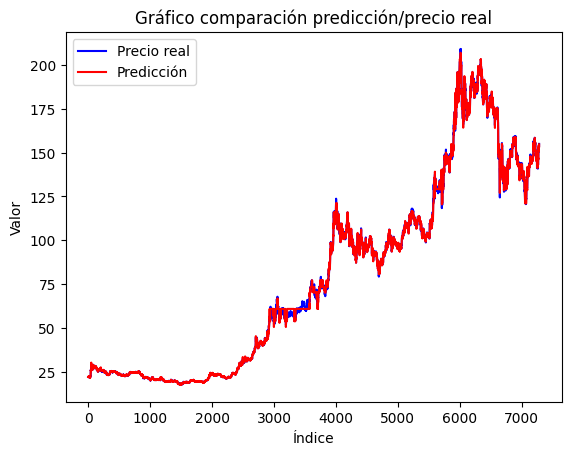

In [ ]:
plt.plot(Valirpr_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [ ]:
suma = 0
n = len(Valirpr_xgb)
mae = np.mean(np.abs(Valirpr_xgb - predict_xgb))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb[i] - Valirpr_xgb[i])/Valirpr_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.5122382410279995
El error medio porcentualemente es: 0.6814544222019102


Predicción con los datos de test

In [ ]:
print(df_test_xgb.tail())
df_test_xgb_aux = df_test_xgb.iloc[:-1].copy()
print(df_test_xgb_aux.tail())
X_test = df_test_xgb_aux[['open', 'high', 'low', 'close']] 
y_test = df_test_xgb_aux['close_next']
dtest = xgb.DMatrix(data=X_test, label=y_test)

                      date    open    high     low   close  close_next
36394  2024-10-08 19:00:00  143.80  143.95  142.40  143.35      142.95
36395  2024-10-08 20:00:00  143.35  143.90  142.35  142.95      143.75
36396  2024-10-08 21:00:00  142.95  144.10  142.25  143.75      144.50
36397  2024-10-08 22:00:00  143.75  144.50  143.35  144.50      144.25
36398  2024-10-08 23:00:00  144.50  144.70  144.05  144.25      143.80
                      date    open    high     low   close  close_next
36393  2024-10-08 18:00:00  142.80  143.95  141.75  143.80      143.35
36394  2024-10-08 19:00:00  143.80  143.95  142.40  143.35      142.95
36395  2024-10-08 20:00:00  143.35  143.90  142.35  142.95      143.75
36396  2024-10-08 21:00:00  142.95  144.10  142.25  143.75      144.50
36397  2024-10-08 22:00:00  143.75  144.50  143.35  144.50      144.25


In [ ]:
predict_xgb_test = bst.predict(dtest)
print(predict_xgb_test)

[154.55492 154.55492 154.55492 ... 143.13017 143.13017 143.53885]


Comprobación de la tasa de error en los datos de test

In [ ]:
Test_xgb = []
for i in range(1,df_test_xgb.shape[0]):
    Test_xgb.append(df_test_xgb.iloc[i].close)

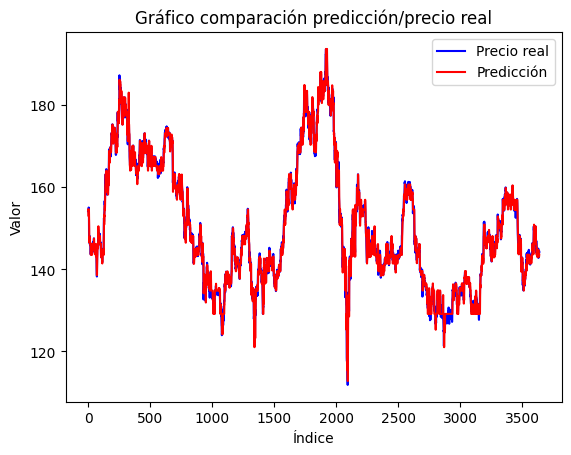

In [ ]:
plt.plot(Test_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb_test, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [ ]:
suma = 0
n = len(Test_xgb)
mae = np.mean(np.abs(Test_xgb - predict_xgb_test))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb_test[i] - Test_xgb[i])/Test_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.0809644047934774
El error medio porcentualemente es: 0.7275942239749614


In [ ]:
def evalXGB(Test_xgb, predict_xgb_test):
    suma = 0
    n = len(Test_xgb)
    for i in range(0,n):
        suma = abs(predict_xgb_test[i] - Test_xgb[i])/Test_xgb[i] +  suma
    error_medio = suma/n
    emp = error_medio*100 # error medio en porcentaje
    return emp

In [ ]:
def train_XGB(num_boost_round, early_stop):
    bstaux = xgb.train(param, dtrain, num_boost_round=num_boost_round, evals=evals, early_stopping_rounds=early_stop, verbose_eval=10)
    predict_xgb_test = bstaux.predict(dtest)
    valor = evalXGB(Test_xgb, predict_xgb_test)
    print(valor)

In [ ]:
train_XGB(100, 10)

[0]	train-rmse:52.03058	validacion-rmse:55.14741
[10]	train-rmse:18.24075	validacion-rmse:19.29663
[20]	train-rmse:6.47113	validacion-rmse:6.89713
[30]	train-rmse:2.49259	validacion-rmse:2.78981
[40]	train-rmse:1.33772	validacion-rmse:1.70668
[50]	train-rmse:1.09531	validacion-rmse:1.52521
[60]	train-rmse:1.05078	validacion-rmse:1.50811
[70]	train-rmse:1.03892	validacion-rmse:1.50938
[71]	train-rmse:1.03808	validacion-rmse:1.50983
0.7275942239749614


# Predicción usando red neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps, 3])  
    return np.array(X), np.array(y)
df_train_aux = df_train[['open', 'high', 'low', 'close']].values
X_train, y_train= create_sequences(df_train_aux, 7)
X_train

array([[[ 3.1 ,  3.35,  3.1 ,  3.25],
        [ 3.25,  3.25,  3.15,  3.15],
        [ 3.15,  3.3 ,  3.15,  3.3 ],
        ...,
        [ 3.25,  3.25,  3.2 ,  3.25],
        [ 3.25,  3.3 ,  3.15,  3.25],
        [ 3.25,  3.4 ,  3.25,  3.4 ]],

       [[ 3.25,  3.25,  3.15,  3.15],
        [ 3.15,  3.3 ,  3.15,  3.3 ],
        [ 3.3 ,  3.3 ,  3.15,  3.3 ],
        ...,
        [ 3.25,  3.3 ,  3.15,  3.25],
        [ 3.25,  3.4 ,  3.25,  3.4 ],
        [ 3.35,  3.55,  3.35,  3.45]],

       [[ 3.15,  3.3 ,  3.15,  3.3 ],
        [ 3.3 ,  3.3 ,  3.15,  3.3 ],
        [ 3.25,  3.25,  3.2 ,  3.25],
        ...,
        [ 3.25,  3.4 ,  3.25,  3.4 ],
        [ 3.35,  3.55,  3.35,  3.45],
        [ 3.45,  3.7 ,  3.4 ,  3.7 ]],

       ...,

       [[22.1 , 22.4 , 21.95, 22.2 ],
        [22.2 , 22.25, 21.9 , 22.15],
        [22.15, 22.2 , 21.95, 22.1 ],
        ...,
        [22.1 , 22.1 , 21.95, 22.  ],
        [22.  , 22.05, 21.9 , 22.  ],
        [22.  , 22.1 , 21.9 , 22.  ]],

       [[22.2 ,

In [ ]:
df_vali_aux = df_vali[['open', 'high', 'low', 'close']].values
X_vali, y_vali= create_sequences(df_vali_aux, 7)
X_vali

array([[[ 22.1 ,  22.3 ,  22.05,  22.15],
        [ 22.15,  22.25,  22.1 ,  22.1 ],
        [ 22.1 ,  22.1 ,  22.  ,  22.  ],
        ...,
        [ 21.95,  22.05,  21.9 ,  22.  ],
        [ 22.  ,  22.1 ,  22.  ,  22.05],
        [ 22.  ,  22.2 ,  22.  ,  22.05]],

       [[ 22.15,  22.25,  22.1 ,  22.1 ],
        [ 22.1 ,  22.1 ,  22.  ,  22.  ],
        [ 22.  ,  22.  ,  21.9 ,  21.95],
        ...,
        [ 22.  ,  22.1 ,  22.  ,  22.05],
        [ 22.  ,  22.2 ,  22.  ,  22.05],
        [ 22.05,  22.15,  22.  ,  22.05]],

       [[ 22.1 ,  22.1 ,  22.  ,  22.  ],
        [ 22.  ,  22.  ,  21.9 ,  21.95],
        [ 21.95,  22.05,  21.9 ,  22.  ],
        ...,
        [ 22.  ,  22.2 ,  22.  ,  22.05],
        [ 22.05,  22.15,  22.  ,  22.05],
        [ 22.05,  22.05,  21.95,  22.05]],

       ...,

       [[150.35, 153.4 , 150.15, 152.95],
        [152.95, 153.15, 151.2 , 152.6 ],
        [152.6 , 153.25, 151.35, 152.05],
        ...,
        [153.4 , 153.8 , 152.7 , 153.65],
     

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mape')

C:\Users\raulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
X_trainR = []
for i in X_train:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_trainR.append(aux)       
X_trainR = np.array(X_trainR)    

In [ ]:
X_valiR = []
for i in X_vali:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_valiR.append(aux)  
X_valiR = np.array(X_valiR)

In [ ]:
history = model.fit(X_trainR, y_train, epochs=3, batch_size=96, validation_data=(X_valiR, y_vali), shuffle=False)


Epoch 1/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - loss: 8.1060 - val_loss: 1.0375
Epoch 2/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 2.0628 - val_loss: 1.5276
Epoch 3/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 2.0603 - val_loss: 2.2862


In [ ]:
y_pred = model.predict(X_valiR)
y_pred

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


array([[ 22.550318],
       [ 22.560825],
       [ 22.578642],
       ...,
       [156.88498 ],
       [157.18063 ],
       [157.34988 ]], dtype=float32)

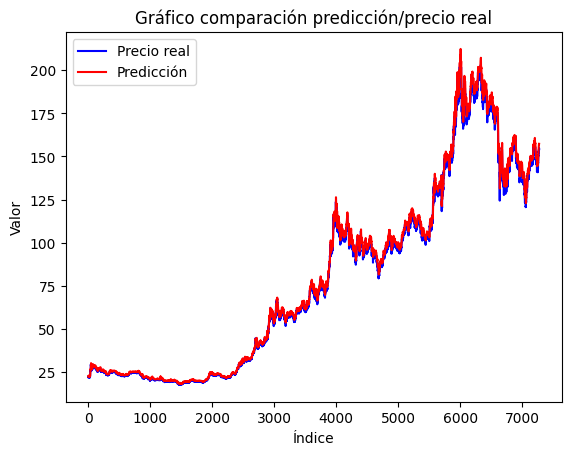

In [ ]:
Valirpr = []
for i in range(7,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_pred, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [ ]:
print(len(y_pred))

7273


In [ ]:
y_pred_aux=[]
for elem in y_pred:
    y_pred_aux.append(elem[0])
y_pred_aux = np.array(y_pred_aux)

In [ ]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - y_pred_aux))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_aux[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.779929108700332
El error medio porcentualemente es: 2.2861856424805467


In [ ]:
model.save('mi_modelo_denso3_96.h5')

# Implementación con red neuronal LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(64, activation='relu', input_shape=(7, 4)))
modelLSTM.add(Dense(1))

C:\Users\raulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modelLSTM.compile(optimizer='adam', loss='mape')

In [ ]:
historyLSTM = modelLSTM.fit(X_train, y_train, epochs=15, batch_size=6, validation_data=(X_vali, y_vali), shuffle=False)

Epoch 1/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 5.5134 - val_loss: 6.5126
Epoch 2/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 2.7245 - val_loss: 7.6965
Epoch 3/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 2.3460 - val_loss: 8.7315
Epoch 4/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 2.1830 - val_loss: 6.9652
Epoch 5/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 2.1550 - val_loss: 8.7698
Epoch 6/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 1.9777 - val_loss: 7.4608
Epoch 7/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 2.1129 - val_loss: 6.9380
Epoch 8/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 2.0841 - val_loss: 6.8107
Epoch 9/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 2.1655 - val_loss: 3.4237
Epoch 10/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.7222 - val_loss: 5.6864
Epoch 11/15
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 2.0878 - val_loss: 4.9285
Epoch 12/15
4246/4246 ━━━━━━━━

In [ ]:
y_predLSTM = modelLSTM.predict(X_vali)
y_predLSTM

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 22.205893],
       [ 22.18765 ],
       [ 22.146019],
       ...,
       [146.58955 ],
       [146.13191 ],
       [146.97177 ]], dtype=float32)

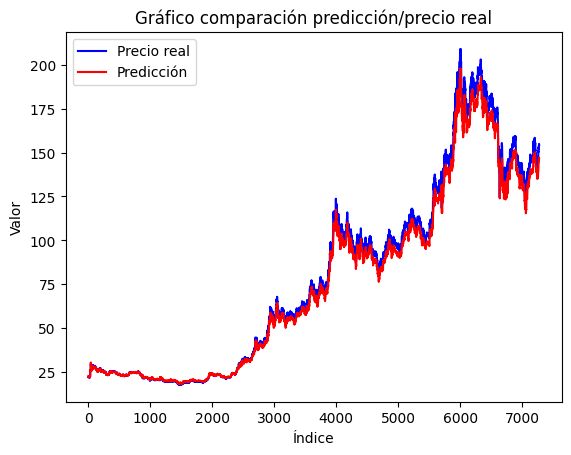

In [ ]:
Valirpr = []
for i in range(7,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predLSTM, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [ ]:
y_pred_auxLSTM=[]
for elem in y_predLSTM:
    y_pred_auxLSTM.append(elem[0])
y_pred_auxLSTM = np.array(y_pred_auxLSTM)

In [ ]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - y_pred_auxLSTM))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxLSTM[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 3.3711557011976048
El error medio porcentualemente es: 3.3105227281408593


In [ ]:
modelLSTM.save('mi_modelo_lstm5_6.h5')

Probamos en los datos de test

In [ ]:
df_test_aux = df_test[['open', 'high', 'low', 'close']].values
X_test, y_test = create_sequences(df_test_aux, 7)
X_test

array([[[154.35, 154.5 , 153.45, 154.1 ],
        [154.1 , 154.8 , 153.25, 154.15],
        [154.15, 154.3 , 153.25, 154.15],
        ...,
        [155.05, 155.4 , 153.1 , 153.3 ],
        [153.3 , 153.7 , 152.45, 153.05],
        [153.05, 153.25, 145.75, 147.5 ]],

       [[154.1 , 154.8 , 153.25, 154.15],
        [154.15, 154.3 , 153.25, 154.15],
        [154.15, 155.2 , 153.  , 155.05],
        ...,
        [153.3 , 153.7 , 152.45, 153.05],
        [153.05, 153.25, 145.75, 147.5 ],
        [147.5 , 148.65, 145.35, 146.95]],

       [[154.15, 154.3 , 153.25, 154.15],
        [154.15, 155.2 , 153.  , 155.05],
        [155.05, 155.4 , 153.1 , 153.3 ],
        ...,
        [153.05, 153.25, 145.75, 147.5 ],
        [147.5 , 148.65, 145.35, 146.95],
        [146.95, 148.8 , 145.15, 148.  ]],

       ...,

       [[143.3 , 145.1 , 142.7 , 145.05],
        [145.05, 145.55, 142.45, 144.15],
        [144.15, 144.4 , 141.2 , 142.8 ],
        ...,
        [143.8 , 143.95, 142.4 , 143.35],
     

In [ ]:
y_predLSTMt = modelLSTM.predict(X_test)
y_predLSTMt

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step


array([[142.76546],
       [140.87006],
       [140.84785],
       ...,
       [136.66588],
       [137.26549],
       [137.46864]], dtype=float32)

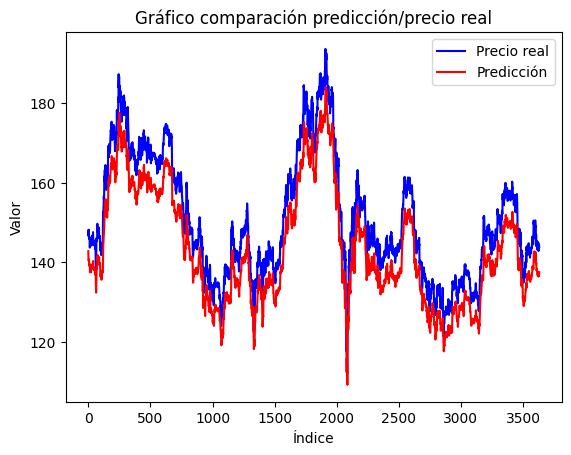

In [ ]:
Testrpr = []
for i in range(7,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predLSTMt, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [ ]:
y_pred_auxLSTM=[]
for elem in y_predLSTMt:
    y_pred_auxLSTM.append(elem[0])
y_pred_auxLSTM = np.array(y_pred_auxLSTM)

In [ ]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - y_pred_auxLSTM))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxLSTM[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 7.087567871362627
El error medio porcentualemente es: 4.695824243879326
